# <span style="color:red"> NUMERICAL EXERCISES 10 </span>

## <span style="color:blue">Exercise 10.1</span>

This exercise required parallelization of the Genetic Algorithm code from the previous exercises (the Travel Salesman Problem, TSP), using MPI libraries, i.e., exploiting multiple cores (called "nodes"), independent for CPU and memory, to work on the same problem.

MPI libraries contain functions that allow different computation nodes to communicate and exchange data, so that one is able to coordinate nodes, which would otherwise be independent.

The "Single Program Multiple Data" (SPMD) model is used: all nodes run the same program, and any differentiation can be achieved by the fact that, through the MPI_Comm_size() function, each process has access to the number that identifies itself.

I always used 8 compute cores, and implemented parallel programming for the TSP in two different ways:

**1) NON-COMMUNICATING CORES (NC)**.  Each node, also called "Continent," runs its Genetic Algorithm independently. The random number generator is initialized with different seeds, for each continent, so as to have non-repeating program executions. Eventually each Continent will have found its optimal path.

**2) COMMUNICATING CORES (C)**. Each continent runs its Genetic Algorithm independently, but every $G_{migr}$, the various continents exchange their best $M_{migr}$ elements. The pairings for exchanges between continents are randomly selected.

The exercise consisted only of an integration in c++ code, which will be applied to a concrete problem in the next exercise.

## <span style="color:blue">Exercise 10.2</span>

In this exercise I use the parallelized code to solve a concrete problem, namely the TSP for the 50 U.S. capitals, of which latitude and longitude are known from an input file. 
In order not to overcomplicate things, I use the "Terraplattist Approximation" and consider latitude as the x-coordinate and longituidine as the y-coordinate.

I used the following parameters: 
- $Proc = 8$ nodes.
- Population of $M=2000$ chromosomes for each node.
- $G = 500$ generations for each node.
- $G_{migr} = 25$ generations between exchanges in the case of Communicating Cores.
- $M_{migr}=10$ chromosomes exchanged per exchange in the case of Communicating Cores.
These parameters were chosen after numerous trials, and they are the ones that optimize the results.

____________________________________________________________________________________________________

I ran the program twice, first with non-communicating cores, then with communicating cores. For each of the two modes I report the following graphs:
- Average path length of the best half of the chromosomes for each continent as a function of generation number (starting with generation 100 to visualize better).
- Path length of the best chromosome for each continent as a function of generation number (starting with generation 100 to visualize better).
- Final best pathway found by each continent.

In the case of communicating nodes, for the last point the graphs coincide, so I have reported only one.


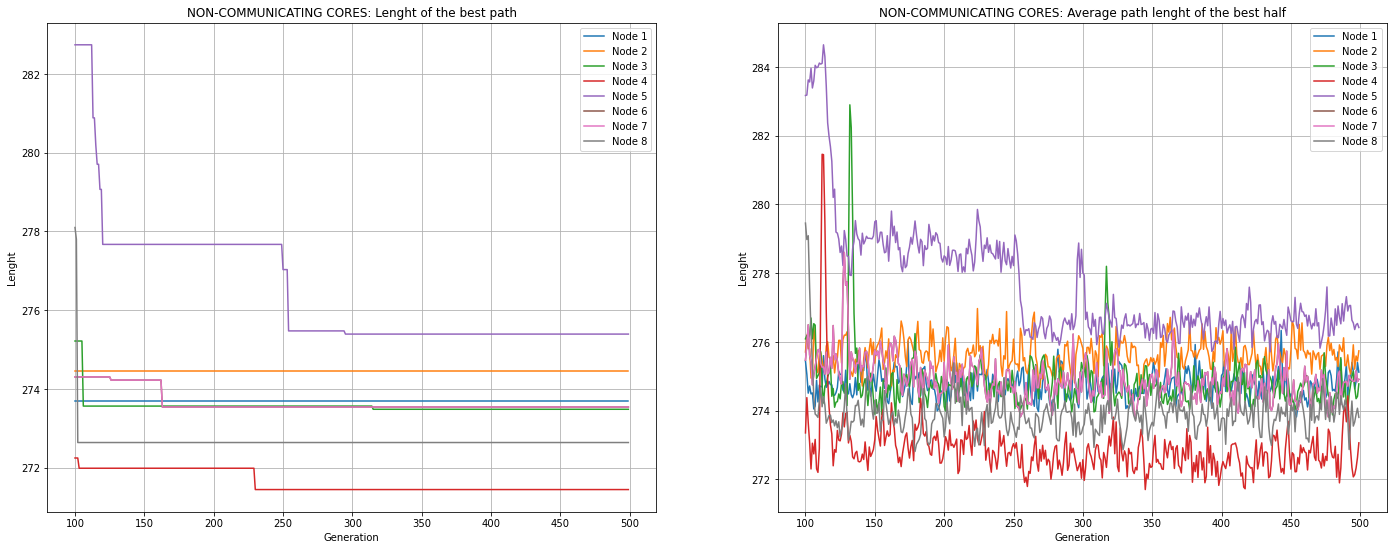

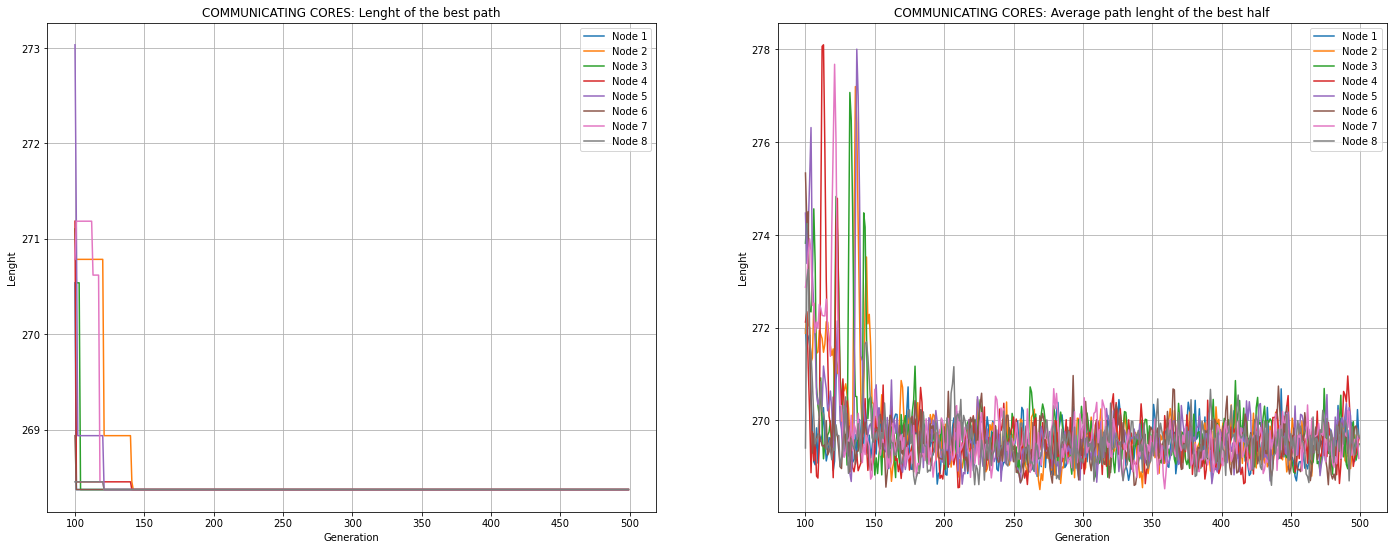

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# NON COMMUNICATING CORES: BESTIES

fig, plots= plt.subplots(1,2, figsize=(24,9))
besties = np.zeros(8)

for i in range(8):
    x,y1,y2 = np.loadtxt('data/bestiesNC'+str(i+1)+'.txt', usecols=(0,1,2), unpack = 'true')
    besties[i]=y1[499]
    x=x[100:500]
    y1=y1[100:500]
    y2=y2[100:500]
    plots[0].plot(x,y1, label='Node '+str(i+1))
    plots[1].plot(x,y2, label='Node '+str(i+1))
  
plots[0].legend()
plots[0].grid(True)
plots[0].set_title('NON-COMMUNICATING CORES: Lenght of the best path')
plots[0].set_ylabel('Lenght')
plots[0].set_xlabel('Generation') 
plots[1].legend()
plots[1].grid(True)
plots[1].set_title('NON-COMMUNICATING CORES: Average path lenght of the best half')
plots[1].set_ylabel('Lenght')
plots[1].set_xlabel('Generation') 
plt.show()

# COMMUNICATING CORES: BESTIES

fig, plots= plt.subplots(1,2, figsize=(24,9))

for i in range(8):
    x,y1,y2 = np.loadtxt('data/bestiesC'+str(i+1)+'.txt', usecols=(0,1,2), unpack = 'true')
    x=x[100:500]
    y1=y1[100:500]
    y2=y2[100:500]
    plots[0].plot(x,y1, label='Node '+str(i+1))
    plots[1].plot(x,y2, label='Node '+str(i+1))
    
best = y1[399]
plots[0].legend()
plots[0].grid(True)
plots[0].set_title('COMMUNICATING CORES: Lenght of the best path')
plots[0].set_ylabel('Lenght')
plots[0].set_xlabel('Generation') 
plots[1].legend()
plots[1].grid(True)
plots[1].set_title('COMMUNICATING CORES: Average path lenght of the best half')
plots[1].set_ylabel('Lenght')
plots[1].set_xlabel('Generation') 

plt.show()

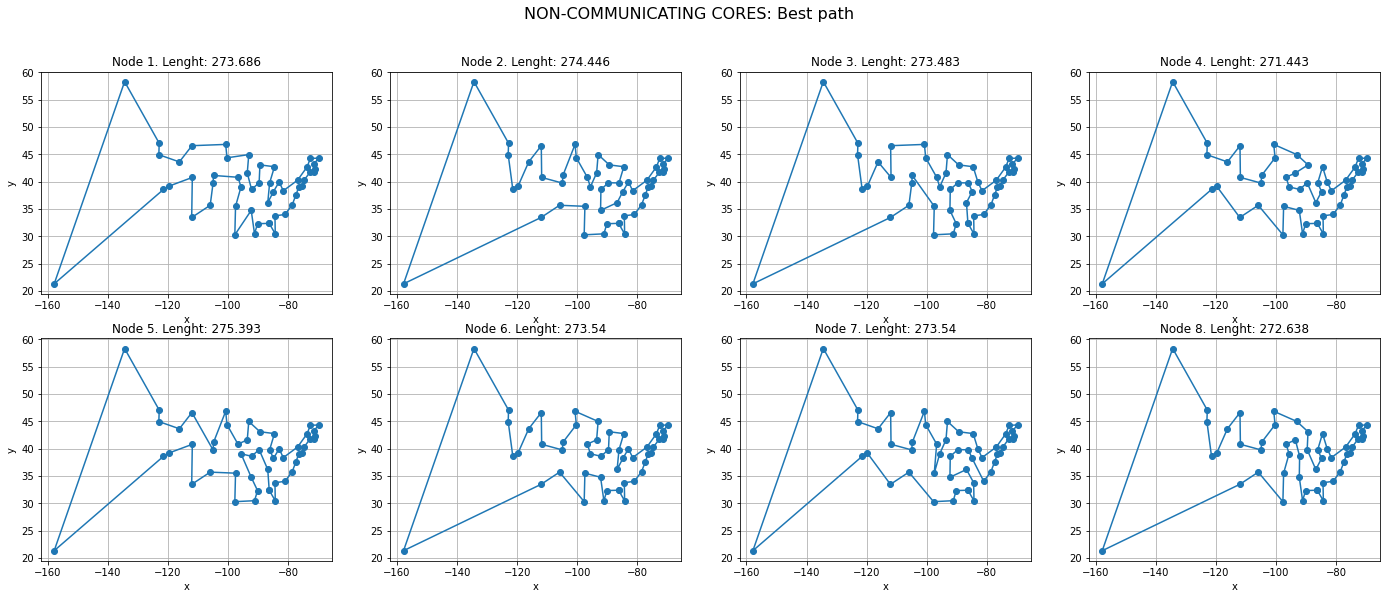

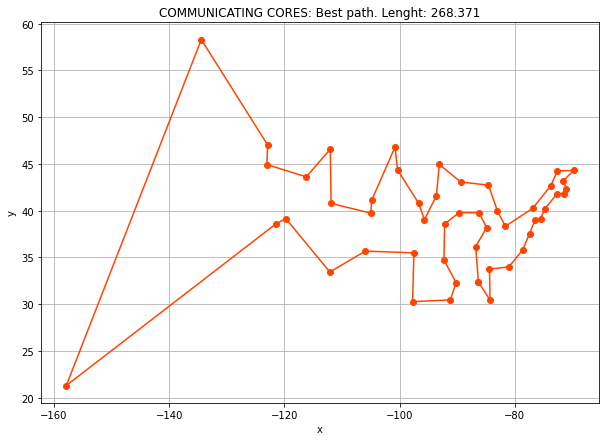

In [2]:
# NON COMMUNICATING CORES: PATHS

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))=plt.subplots(2,4,  figsize=(24, 9))

fig.suptitle("NON-COMMUNICATING CORES: Best path", size =16)

x,y = np.loadtxt('data/pathNC1.txt', usecols=(0,1), unpack = 'true')
ax1.plot(x,y, marker='o')
ax1.grid(True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Node 1. Lenght: ' + str(besties[0]))

x,y = np.loadtxt('data/pathNC2.txt', usecols=(0,1), unpack = 'true')
ax2.plot(x,y, marker='o')
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Node 2. Lenght: ' + str(besties[1]))

x,y = np.loadtxt('data/pathNC3.txt', usecols=(0,1), unpack = 'true')
ax3.plot(x,y, marker='o')
ax3.grid(True)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Node 3. Lenght: ' + str(besties[2]))

x,y = np.loadtxt('data/pathNC4.txt', usecols=(0,1), unpack = 'true')
ax4.plot(x,y, marker='o')
ax4.grid(True)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Node 4. Lenght: ' + str(besties[3]))

x,y = np.loadtxt('data/pathNC5.txt', usecols=(0,1), unpack = 'true')
ax5.plot(x,y, marker='o')
ax5.grid(True)
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_title('Node 5. Lenght: ' + str(besties[4]))

x,y = np.loadtxt('data/pathNC6.txt', usecols=(0,1), unpack = 'true')
ax6.plot(x,y, marker='o')
ax6.grid(True)
ax6.set_xlabel('x')
ax6.set_ylabel('y')
ax6.set_title('Node 6. Lenght: ' + str(besties[5]))

x,y = np.loadtxt('data/pathNC7.txt', usecols=(0,1), unpack = 'true')
ax7.plot(x,y, marker='o')
ax7.grid(True)
ax7.set_xlabel('x')
ax7.set_ylabel('y')
ax7.set_title('Node 7. Lenght: ' + str(besties[6]))

x,y = np.loadtxt('data/pathNC8.txt', usecols=(0,1), unpack = 'true')
ax8.plot(x,y, marker='o')
ax8.grid(True)
ax8.set_xlabel('x')
ax8.set_ylabel('y')
ax8.set_title('Node 8. Lenght: ' + str(besties[7]))

plt.show()

# COMMUNICATING CORES: PATHS

plt.figure(figsize=(10,7))
x,y = np.loadtxt("data/pathC1.txt",usecols=(0,1), unpack = 'true')
plt.plot(x,y, color='orangered', marker='o')
plt.title('COMMUNICATING CORES: Best path. Lenght: ' + str(best))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

###### CONCLUSIONS

1) The first and most trivial conclusion that can be drawn from the graphs is that program execution with communicating cores gives better results than execution with non-communicating cores. The best path found has length 268.371 versus 271.433 of the non-communicating node four. The other seven nodes give worse results, up to 275.393 of node five. 

2) An interesting aspect is that in the case of communicating cores, although only a few chromosomes are exchanged and only every 25 generations, all nodes converge to the same path. Also, looking at the graphs shows that convergence is much faster than in the case of non-communicating cores

3) The first two observations seem to justify the additional effort of parallel programming: better results and in less time. However, one has to be honest and say that parallel programming was not strictly necessary in this case, in fact by setting the various parameters (number of generations, population, crossover probability, probability of individual mutations, seed of the random number generator) I managed after numerous trials to find the value of 268.371 even with non-communicating cores. However, parallelization has the advantage that it makes it easier to choose the parameters as it offers higher probability of success.

4) One should not think that I have found the best possible solution, no matter how good it is, because the possibilities are $\frac{(n-1)!} {2}$ with $n=50$, about $10^{62}$. The program checks a total of almost $10^8$ solutions and takes a few tens of seconds, say $10$ seconds exaggerating. To check all solutions at this rate would take $10^{55}$ seconds, about $10^{37}$ times the age of the Universe. 